This Notebook will mainly contain the code for the binary classification using TensorFlow.

# Project
## Introduction

In an era where data management is increasingly critical, the digitization and automated analysis of documents are at the forefront of technological advancement. This project aims to automate the processing of digitized images by developing an AI-based deep learning solution to generate descriptive captions, thereby improving the efficiency, management, and value of visual data.

## The TouNum company

**TouNum** specializes in converting paper documents into digital formats. The company aims to expand its services by integrating advanced **Machine Learning** and **Deep Learning** algorithms to automate the classification and caption generation for digitized images.

## Project overview

TouNum aims to develop an image **captioning** solution capable of analyzing and generating automatic captions. The project also includes **binary classification** to distinguish photos from other types of images. Pre-processing** will be required to improve image quality before processing by **deep learning** models.

**Objectives**

- **Image classification**: Develop a template to automatically distinguish photos from other types of images. 
- **Automatic caption generation**: Design a model combining **convolutional neural networks (CNN)** and **recurrent neural networks (RNN)** to generate descriptive captions from images.

**Challenges**
The project must meet the following challenges: 
- **Complex classification**: Distinguishing photos from other types of documents (**paintings**, **diagrams**, **sketches**, and **texts**,) is essential to avoid processing errors. 
- **Image quality**: Scanned images can vary in quality (blurred, noisy, ...), which can affect the performance of machine learning models.

**Deliverables**
1.	**Deliverable 1: Binary Classification (Week 3)**
    - Prototype classification model with a report detailing model performance.
2.	**Deliverable 2: Image pre-processing (Week 4)**
    - Implementation of image pre-processing techniques to improve image quality prior to analysis.
3.	**Deliverable 3: Image Captioning (Week 5)**
    - Complete model integrating binary classification and automatic legend generation, with results analysis.
4.	**Presentation (End of Project)**
    - A 20-minute presentation explaining the workflow, the results obtained, and a question-and-answer session with the TouNum committee.


This project represents an opportunity for **TouNum** to position itself as an innovative leader in digitization, by integrating **artificial intelligence** and **Machine Learning** solutions to improve the efficiency of its customers' visual data management.

<div style="text-align: center;">
  <img src="img/img/dscesiprojectdiagram.drawio_1.png" alt="Project Diagram" style="width:80%; height:auto; display: inline-block;"/>
</div>

## Environment initialization 
### Download requirements 

To ensure consistency across the project team and for anyone intending to execute the code, it is crucial to work within the same virtual environment. We use the `requirements.txt` file, which lists the necessary Python packages to be installed for the application to function correctly. By setting up this standardized environment, we avoid potential discrepancies and ensure that all dependencies are managed properly. To proceed, create and activate a virtual environment, then install the required packages listed in requirements.txt.



In [1]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Import libraries
In the cell below, we import all the libraries that are neessary to run the code. We will explain what those libraries are for in the future when they are used.

In [1]:
# Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from onedrivedownloader import download
import os
from py7zr import unpack_7zarchive
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL
import os
import requests
import zipfile
import shutil

2024-10-10 23:12:00.646501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-10 23:12:00.701570: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-10 23:12:00.718681: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-10 23:12:00.819987: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-10 23:12:01.739604: W tensorflow/compiler/tf2

### Set up GPU
This code checks for available GPUs in the TensorFlow environment and enables memory growth for each GPU. This setting helps manage memory more efficiently during model training.

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        # Enable memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1728594723.639418    3978 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728594723.756160    3978 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728594723.758304    3978 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728594723.762568    3978 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

## Data download
In this first delivrable, we will train our classification model on labeled data. Our team has made these data available in a [sharepoint](https://viacesifr-my.sharepoint.com/:u:/g/personal/arslane_ouldslimane_viacesi_fr/EYxF-OL6MXVIqY_Jps7fpGMBLUZzrsJajUZ3jHzgImkp_w?e=rvtSN6).

Let's download the zip file. It contains 6 folders with data: 

- 5 folders for Deliverable 1 (`Photo`, `Painting`, `Schematics`, `Sketch` and `Text`) 
- 1 folder for Deliverable 2 (`Dataset-L2`) 

During download, the file will be unzipped and we'll delete the Deliverable 2 folder, as we won't need it.

In [4]:
# Path where the downloaded file will be saved
filename = 'dataset/dataset.7z'
if not os.path.exists('./dataset'):
    # URL of the dataset to download
    url = 'https://viacesifr-my.sharepoint.com/:u:/g/personal/arslane_ouldslimane_viacesi_fr/EYxF-OL6MXVIqY_Jps7fpGMBLUZzrsJajUZ3jHzgImkp_w?e=rvtSN6'
    # Download the dataset from the specified URL and extract it
    download(
        url, 
        filename, 
        unzip=True,             # Automatically unzip the downloaded file
        force_unzip=True,       # Force unzip even if the path exists
        unzip_path='./datasets/',   # Path to extract the contents
        clean=True,             # Clean up temporary files after extraction
        )

    # unzip in python
    unpack_7zarchive(filename, './dataset/')
    # execution time: 12m 40sclass_labels = sorted(os.listdir('./dataset'))

In [5]:
# delete the 7z file
os.remove(filename)

In [6]:
# delete deliverable 2 dataset
shutil.rmtree('./dataset/Dataset-L2/')

## Data cleansing
### Deleting problem images
Some of the images provided may pose a problem when training our future model.

Although our data is correctly labeled, our team was able to identify a few anomalies.

Firstly, some files are corrupted (mime type error). For example, some files with a `jpg` extension were encoded as a `png` extension.

In addition, we were able to find grayscale images in our data. They are distinct from one-bit bi-tonal black-and-white images, which, in the context of computer imaging, are images with only two colors: black and white (also called bilevel or binary images). In our model, we want to process color images.

Recently, the `Sketch` folder contained 2 types of images. Sketches of faces, but also non-realistic drawings of objects, as you can see below:

<div style="text-align: center;">
  <img src="img/img/000_1_1_sz1.jpg" alt="Image 1" style="width: 200px; height: auto; display: inline-block;" />
  <img src="img/img/1.png" alt="Image 2" style="width: 200px; height: auto; display: inline-block;" />
</div>

The presence these drawings in the `Sketch` class introduces noise into the dataset, which can mislead the model during training. The model might struggle to differentiate between real sketches and drawings, reducing its ability to accurately classify images as sketches. This issue becomes more problematic considering the already limited number of samples in the `Sketch` class that we will see afterwards, making the class even more underrepresented and more prone to misclassification.

To prevent the model from learning incorrect patterns or associating incorrect features with sketches, it is crucial to clean the data by removing these drawings. This cleaning process will ensure that the images belonging to the `Sketch` class are all of similar nature and style.

Moreover, the grayscale images should either be converted to color or excluded from the dataset to maintain uniformity, as the model is designed to process color images only.

However, converting to colors may corupt the images. The same goes with modifying the mime type of the mismatch mime types images.

For that matter, we decided to delete all these problematic data. The code used for cleaning our data can be found in the python file `images_check.py` hat we import below. The cleaned dataset will be placed in another folder called `dataset_clean`.

In [7]:
# from images_check import clean_dataset
# input_path = 'dataset/'
# output_path = 'dataset_clean/'
# clean_dataset(input_path, output_path)

In [8]:
# from organised_image import reorganize_dataset
# input_path = 'dataset_clean/'
# output_path = 'dataset_organised/'
# reorganize_dataset(input_path, output_path)

We rearrange the images into folders according to their classes with one folder for photos and another folder for the rest named "non-photo". This process will ensure that the dataset is well-organized and easy to manage.

### Images preprocessing
Our images come in various shapes and sizes, which can pose challenges when training a machine learning model. Inconsistent dimensions can lead to complications in the data pipeline, as neural networks require fixed-size input. 

By resizing the images to a uniform size of 120x120 pixels, we ensure that each image is processed in the same way, making it easier for the model to learn from the data. This uniformity allows the model to focus on learning features relevant to classification without being affected by variations in image dimensions. Moreover, batching the data with a size of 32 optimizes the training process by leveraging vectorized operations, improving the speed and efficiency of computations. 

Ultimately, thorough preprocessing enhances the model's ability to generalize well to unseen data, ensuring that it performs reliably in real-world applications.

In the following code, each image will be resized to `120 pixels in width` and `120 pixels in height`.

We will be using `tf.keras.preprocessing.image_dataset_from_directory` to loads images from the specified directory. It automatically labels the images based on the names of the subdirectories. We use the `label_mode='binary'` option indicates that you’re performing binary classification

In [3]:
image_w = 120
image_h = 120
batch_s = 128

dir_path = './dataset_organised/'

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dir_path,
    seed=42,
    image_size=(image_h, image_w),
    batch_size=batch_s,
    label_mode='binary',
)

Found 40284 files belonging to 2 classes.


## Data analysis
Now that our dataset has been cleaned of any sources of noise, let's analyze the distribution of images across different classes.

The following code will help us visualize the number of images per class in the cleaned and reorganized dataset.

This visualization will helps us understand if any class has significantly more or fewer images than the others, which is known as __class imbalance__. A significant imbalance can lead to poor model performance, especially for underrepresented classes, so this step is key to determine if techniques like data augmentation or class weighting are needed.

Non-Photo: 30316
Photo: 9968


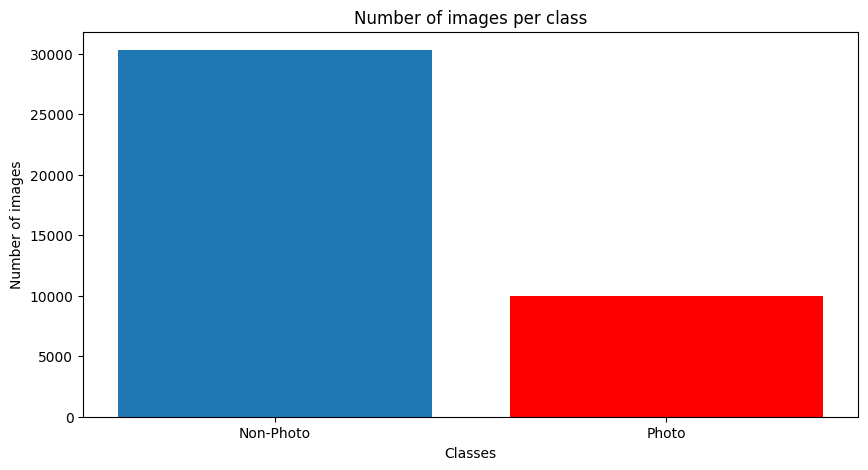

In [4]:
class_labels = sorted(os.listdir(dir_path))
class_labels

# count the number of images per class
count = {}
for label in class_labels:
    count[label] = len(os.listdir(dir_path + label))
    print(f'{label}: {count[label]}')
    
# plot the number of images per class
plt.figure(figsize=(10, 5))
plt.bar(count.keys(), count.values())
# red for 'Photo' label
plt.bar('Photo', count['Photo'], color='red')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Number of images per class')
plt.show()

The bar chart illustrates the distribution of images across two classes: "Non-Photo" and "Photo." Here’s a breakdown of what it represents:

- Class Distribution: The chart shows that there are significantly more `Non-Photo` images (30,316) compared to `Photo` images (9,968). This class imbalance could impact the model's performance, as it may become biased toward the more prevalent class (Non-Photo).

- Vertical Axis: The y-axis represents the number of images per class. In this case, the bar heights correspond to the image counts for each class.

- Horizontal Axis: The x-axis lists the two classes, `Non-Photo` and `Photo`.

This class imbalance suggests that during training, we may need to use techniques such as class weighting, oversampling, or data augmentation for the "Photo" class to help the model learn effectively from both categories and avoid bias towards the "Non-Photo" class.

Let's take a look at the first batch 1 images.

2024-10-10 23:12:13.138760: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


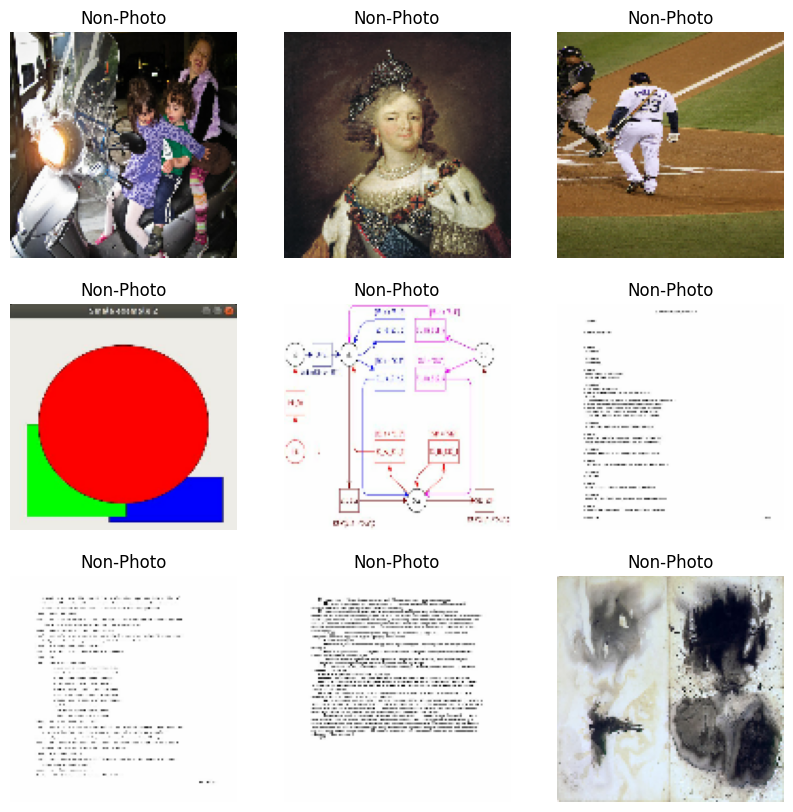

In [5]:
def plot_class_images(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        labels = labels.numpy()  # Convert tensor labels to numpy array
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i].argmax()])  # Use argmax to get the class index
            plt.axis("off")

# Plot the first 9 images with their class names
plot_class_images(dataset, class_labels)

In [6]:
dataset = None

### Dataset separation 

In this section, we define a `split_dataset` function to divide our image dataset into training and test sets. This function builds on TensorFlow's `image_dataset_from_directory` method to load and preprocess images from a directory while automatically partitioning the dataset into training and validation subsets. The dataset is divided according to a given ratio, with the ability to control parameters such as image size, batch size and the type of labels returned.


__Function details__ : 
- **Arguments** : 
- `dir_path`: Path to the directory containing the dataset, where images are organized into subdirectories representing each class. 
- `image_h`, `image_w`: Target height and width for image resizing. 
- `batch_s` : Batch size for model training. 
- `split`: The percentage of the dataset to be allocated to validation (default value is 20%).

**Returns** : 
- `train_set`: A TensorFlow dataset containing the training data. 
- `test_set` : A TensorFlow dataset containing validation data.

By dividing the dataset using this function, we ensure that the model is trained and evaluated on distinct subsets of the data, thus avoiding overfitting and guaranteeing a fair assessment of model performance.

In [7]:
def split_dataset(dir_path, image_h, image_w, batch_s, split=0.2):
    # split the dataset into training and testing
    train_set = tf.keras.preprocessing.image_dataset_from_directory(
        dir_path,
        validation_split=split,
        subset='training',
        seed=42,
        image_size=(image_h, image_w),
        batch_size=batch_s,
        label_mode='binary',
    )

    test_set = tf.keras.preprocessing.image_dataset_from_directory(
        dir_path,
        validation_split=split,
        subset='validation',
        seed=42,
        image_size=(image_h, image_w),
        batch_size=batch_s,
        label_mode='binary',
    )
    return train_set, test_set

train_set, test_set = split_dataset(dir_path, image_h, image_w, batch_s)

Found 40284 files belonging to 2 classes.
Using 32228 files for training.
Found 40284 files belonging to 2 classes.
Using 8056 files for validation.


### Define class weights
This section defines a `set_class_weights` function to manage class imbalance in the dataset that we saw previously, by assigning appropriate weights to each class during model training. This ensures that under-represented classes, are given more weight, helping the model to learn more efficiently from the minority class data.

**Libraries used** : 
- `compute_class_weight` from `sklearn.utils` : This function automatically calculates the weights of each class based on the frequency of their appearance in the data, assigning a higher weight to under-represented classes in order to better balance the learning process.

In [8]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

def set_class_weights(dir_path):
    # Get class labels from dataset
    class_labels = sorted(os.listdir(dir_path))
    print("Classes:", class_labels)

    # Count the number of images per class
    count = {}
    for label in class_labels:
        count[label] = len(os.listdir(dir_path + label))
        print(f'{label}: {count[label]}')

    # Compute class weights to handle imbalance
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(class_labels),
        y=[label for label in class_labels for _ in range(count[label])]
    )

    # Assign class weights
    return {i: class_weights[i] for i in range(len(class_labels))}

class_weight_dict = set_class_weights(dir_path)
print("Class Weights:", class_weight_dict)

Classes: ['Non-Photo', 'Photo']
Non-Photo: 30316
Photo: 9968
Class Weights: {0: 0.6644016360997493, 1: 2.020666131621188}


## The model

## Setting up the model
In this notebook, we aim to enable our AI model to recognize the type of image (its class) among various images. Thus, we want to build a neural network that will analyze images efficiently, achieving good performance in a reduced time.

Convolutional neural networks (CNNs) are more suitable for computer vision tasks. They are specifically designed to process visual data by exploiting the spatial structure of images, reducing parameter complexity, and allowing hierarchical and progressive feature extraction. They also offer better robustness to translations and superior performance compared to traditional neural networks.

The operation of a CNN relies on several types of layers: **convolutional layers**, **pooling layers**, and **fully connected layers**.

<div style="text-align: center;">
  <img src="img/img/conv.png" alt="alt text" style="width: 50%;"/>
</div>

Convolutional layers apply filters to input images to extract local features, such as edges and textures. This works as follows:

<div style="text-align: center;">
  <img src="img/img/filter_cnn.png" alt="alt text" style="width: 50%;"/>
</div>

The goal is to use the values present in the filter at each step. For example, if we define a 3x3 window, it will represent 9 cells of the array (i.e., 9 pixels). The convolution will perform an operation with these 9 pixels. It can be any operation, for example, extracting the largest value (i.e., the pixel with the highest value).

<div style="text-align: center;">
  <img src="img/img/argmax.png" alt="alt text" style="width: 50%;"/>
</div>

We slide the orange window, and at each step, we retrieve the largest value among the 9 pixel values.
We notice that the output of the convolution, which we can call the "feature map," has smaller dimensions than the input image.

Next, pooling layers are used to reduce the size of the feature maps, which decreases the number of parameters and computational cost while retaining essential information.

<div style="text-align: center;">
  <img src="img/img/max-pooling.png" alt="alt text" style="width: 50%;"/>
</div>

The filter window moves two pixels to the right (stride/step = 2) and at each step retrieves the `argmax` corresponding to the largest of the 4 pixel values.

<div style="text-align: center;">
  <img src="img/img/down-samping.png" alt="alt text" style="width: 50%;"/>
</div>

Finally, fully connected (or dense) layers take the flattened feature maps as input and predict the image class based on the information extracted by the previous layers.

CNNs often outperform traditional models, such as multilayer neural networks or methods based on manual features, due to their ability to automatically learn discriminative features. One of the main reasons for their effectiveness is that they use a reduced number of parameters compared to traditional neural networks.

In a traditional neural network, each neuron in a layer is connected to all neurons in the previous layer, leading to an exponential number of parameters as the number of layers and neurons increases. In contrast, CNNs exploit the weight-sharing of filters across the entire image. For example, a convolution filter is applied to different regions of the image, meaning the same set of parameters (or weights) is used to extract local features from each region. This significantly reduces the total number of parameters in the model, making training easier, especially in contexts where training data is limited.

Moreover, this reduction in the number of parameters allows CNNs to be faster to train and require less memory, making it possible to deploy them on devices with limited resources. By reducing model complexity while maintaining the ability to learn complex relationships in the data, CNNs improve generalization.

When designing a CNN, several parameters must be considered.

Hyperparameters to optimize model performance:
- Filter size
- Number of filters per layer
- Learning rate
- Number of training epochs

The activation function, such as ReLU (Rectified Linear Unit), is often used to introduce non-linearity, allowing the model to better learn complex relationships in the data.

Regularization techniques help prevent overfitting and stabilize learning. These include:
- Dropout
- Batch normalization

Finally, the choice of optimizer (e.g., Adam, RMSprop) also influences the speed and efficiency of model convergence during training.



### Data augmentation

In this section, we define a data augmentation pipeline using TensorFlow's Sequential model to enhance the training dataset. The augmentation includes three key transformations:

* **RandomFlip**: This layer randomly flips images horizontally, helping the model learn to recognize features regardless of their orientation.

* **RandomRotation**: This layer randomly rotates images by up to 10%, introducing variability in angle and aiding the model in generalizing better to different orientations of objects.

* **RandomZoom**: This layer randomly zooms into images by 10%, which helps the model learn to focus on different parts of the image and improves robustness to scale variations.

Together, these augmentations increase the diversity of the training dataset, leading to better model performance and generalization.

In [9]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip(
                      "horizontal",
                      input_shape=(image_h, image_w, 3)
                      ), 
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
  ]
)

/home/arslane/Documents/CESI/DataScience/projet/bin/classification_baire/.venv/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Modèle de classification

In [31]:

def generate_model(optimizer='adam', dropout=0.3, l1=0.0, l2=0.0):
    model = Sequential([
        data_augmentation,
        layers.Rescaling(1./255, input_shape=(image_h, image_w, 3)),
        layers.Conv2D(16, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1, l2=l2)),
        layers.MaxPooling2D(),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1, l2=l2)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1, l2=l2)),
        layers.MaxPooling2D(),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1, l2=l2)),
        layers.Dropout(dropout),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
                    optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['AUC', 'accuracy'],
                  )
    
    return model

* **Sequential Model:** The model is built using the Sequential API, which allows us to add layers one by one in a linear fashion. It is simple and intuitive when constructing a model where each layer has exactly one input tensor and one output tensor.
* **Data Augmentation:** We've applied random transformations such as flips, rotations, and zooms to the training images. This technique improves generalization by generating slightly modified versions of the original dataset, which makes the model more robust to variations in data.

* **Rescaling Layer:** This layer normalizes the pixel values of the images from the [0, 255] range to [0, 1], which helps in better model convergence. This normalization makes gradient descent more stable by ensuring that the data is on a consistent scale.

* **Convolutional Layers:**
    * We use **three convolutional layers** in the model, each followed by max-pooling. These layers are used to detect and learn patterns from images.

    * Why 16, 32, and 64 filters?

        **16, 32, 64 filters:** The number of filters increases with each convolutional layer. This is a common pattern to capture more complex features as the layers get deeper. In the initial layers, we look for basic patterns (edges, colors), and in deeper layers, we learn more abstract patterns (shapes, objects).

     **3x3 kernel:** The 3x3 kernel (or filter) size is standard for many CNN architectures because it allows the network to capture small, localized features in the images while keeping the number of parameters manageable.

    * **Padding='same':** This ensures that the output feature map has the same spatial dimensions (height and width) as the input. It adds zeros around the borders of the input image to avoid shrinking the output too quickly. This is important for preserving image information, especially in deeper networks.

    * **Activation Function: ReLU (Rectified Linear Unit):** ReLU is a non-linear activation function that replaces all negative values with 0. It's computationally efficient and introduces non-linearity to the model, enabling the network to learn complex patterns. This activation function helps mitigate the vanishing gradient problem.

* **MaxPooling:**
This layer reduces the spatial dimensions of the feature maps by taking the maximum value from a region (usually 2x2), effectively downsampling the data. It retains the most important features while reducing the computational complexity, and helps prevent overfitting by creating more abstract representations.

* **Batch Normalization:** This layer normalizes the output of the previous layer, which helps in stabilizing and accelerating the training process.

* **Dropout (dropout=0.3 by default):** Dropout is a regularization technique that randomly "drops" (disables) a fraction of neurons during training, which forces the model to not rely too much on specific neurons, improving generalization and reducing overfitting. The default value here is 0.3, but this can be adjusted to add more or less regularization when needed.

* **Flattening:** The feature maps output from the convolutional layers are 2D matrices. Flattening converts these 2D matrices into a 1D vector, making them suitable for input to fully connected (Dense) layers. This step bridges the gap between convolutional layers and dense layers.

* **Dense (Fully Connected) Layers:**
    * The first dense layer contains 128 units with ReLU activation, which helps in learning complex representations from the flattened input.
    * The second dense layer has 1 unit with a Sigmoid activation function, as the model is performing binary classification.

* **Sigmoid:** The sigmoid function turns the raw output into a probability for the binary classification task, outputting a value between 0 and 1.

* **Layer Count:**
    * **Total Layers:**
        1 Data Augmentation
        1 Rescaling
        3 Convolutional Layers
        3 MaxPooling Layers
        1 Batch Normalization Layer
        1 Dropout Layer
        1 Flatten Layer
        2 Dense Layers
    * In total, we have **12 layers**, designed to progressively extract features from the images, downsample the spatial dimensions, prevent overfitting, and perform classification.

* **Metrics:** AUC (Area Under the Receiver Operating Characteristic Curve), Accuracy, and Binary Crossentropy. AUC measures the model's ability to distinguish between classes, while Accuracy calculates the overall performance of the model

Now, we will initialize our model with the **Adam (Adaptive Moment Estimation)** optimizer, which is an optimization algorithm that adjusts the learning rate for each parameter based on the first and second moments of the gradients. This adaptability allows for faster convergence and better performance, especially in complex training scenarios.

We use it with a learning rate of 0.001 in this model because it stabilizes convergence and effectively manages the complexities of image classification tasks.

In [32]:
model01 = generate_model(optimizer = tf.keras.optimizers.Adam(0.001))
model01.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 120, 120, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 60, 60, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,867,297 (7.12 MB)

 Trainable params: 1,867,169 (7.12 MB)

 Non-trainable params: 128 (512.00 B)

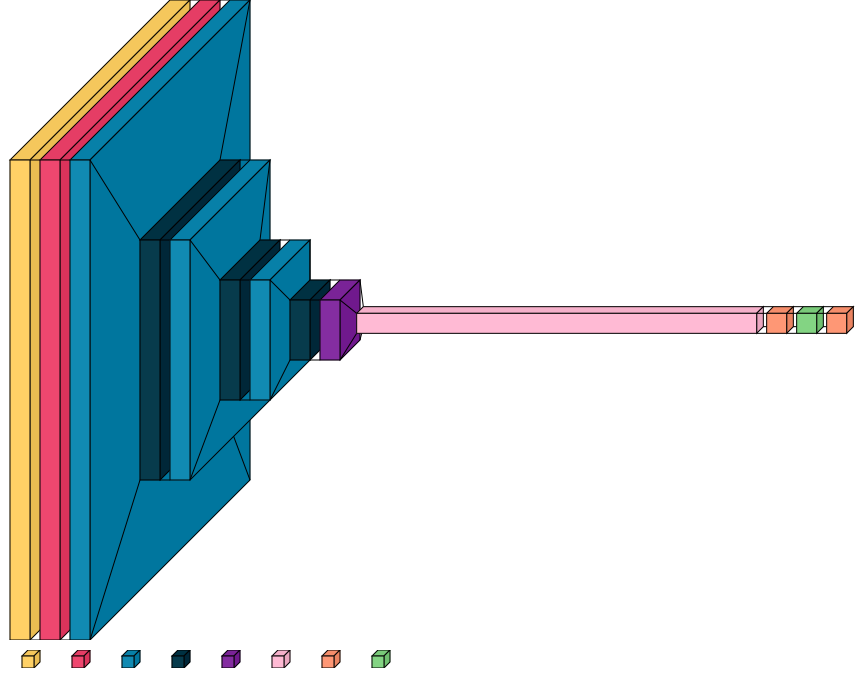

In [33]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model01, legend=True, font_color='black')

This visualization, generated using the `visualkeras` library, provides a layered view of the neural network model's architecture. Here’s an explanation of each part:

- **Layered Structure**: Each block represents a different layer in the model. The blocks are stacked to show the order of the layers from input (left side) to output (right side). Larger blocks typically indicate convolutional layers, which process image data by extracting features, while smaller blocks are likely fully connected (dense) layers that aggregate features for the final classification.

- **Color Coding**: Different colors represent various layer types. For example, the blue layers are convolutional layers, while pink or purple blocks represent respectively fully connected layers and Batch Normalization. The color legend below helps identify each layer type by color : 

    1. **Yellow**: **Data Augmentation** -

    2. **Orange**: **Rescaling** - 

    3. **Light Blue**: **Convolution (Conv2D)** - 

    4. **Dark Blue**: **Max Pooling (MaxPooling2D)** - 

    5. **Purple**: **Batch Normalization** - 

    6. **Green**: **Flatten** - 

    7. **Pink**: **Dense (Fully Connected)** - 

    8. **Red**: **Dropout** - 
    

- **Layer Depth**: The depth and size of each layer visually indicate the complexity of the model at each stage. The initial layers appear larger, which is common for convolutional networks as they work on high-dimensional data. The layers progressively get smaller as they extract increasingly abstract features from the input.

- **Legend**: Enabling `legend=True` provides a color-coded legend below the diagram, making it easier to identify which colors correspond to which layer types. This helps users quickly understand the composition of the model.

- **Font Customization**: The font color is set to black (`font_color='black'`), which enhances readability for the text annotations associated with each layer.

This visual representation is a useful tool for quickly understanding the model's structure, particularly the flow of data through various types of layers. It can help identify the sequence of convolutional, pooling, and dense layers, providing insight into how the model is structured to process and classify images.

In [34]:
epochs = 15     # Number of epochs for training


history01 = model01.fit(        # Train the model with the training set
    train_set,
    epochs=epochs,
    validation_data=test_set,
    class_weight=class_weight_dict,
    
)


Epoch 1/15


W0000 00:00:1728597981.267822    4371 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728597981.287327    4371 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728597981.291764    4371 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728597981.296485    4371 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728597981.302943    4371 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728597981.309252    4371 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728597981.320388    4371 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728597981.330897    4371 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
Corrupt JPEG data: 419 extraneous bytes 

251/252 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - AUC: 0.8371 - accuracy: 0.7279 - loss: 0.5242

W0000 00:00:1728598000.975368    4375 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598000.978436    4375 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598000.981702    4375 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598000.984779    4375 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598000.989385    4375 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598000.993296    4375 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598000.999768    4375 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598001.006780    4375 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598001.016671    4375 gp

252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - AUC: 0.8372 - accuracy: 0.7279 - loss: 0.5238

W0000 00:00:1728598003.113011    4369 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598003.116777    4369 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598003.120865    4369 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598003.124713    4369 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598003.128098    4369 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598003.131263    4369 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598003.134971    4369 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598003.142840    4369 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598003.151612    4369 gp

252/252 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - AUC: 0.8373 - accuracy: 0.7280 - loss: 0.5235 - val_AUC: 0.7071 - val_accuracy: 0.7576 - val_loss: 1.1863
Epoch 2/15


W0000 00:00:1728598007.331377    4376 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598007.334355    4376 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598007.337309    4376 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598007.340681    4376 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598007.343657    4376 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598007.346516    4376 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598007.350390    4376 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598007.353602    4376 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1728598007.357233    4376 gp

  1/252 ━━━━━━━━━━━━━━━━━━━━ 43s 171ms/step - AUC: 0.9204 - accuracy: 0.7578 - loss: 0.3235

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - AUC: 0.9027 - accuracy: 0.7838 - loss: 0.3692 - val_AUC: 0.9280 - val_accuracy: 0.8093 - val_loss: 0.3581
Epoch 3/15
  1/252 ━━━━━━━━━━━━━━━━━━━━ 1:39 397ms/step - AUC: 0.9238 - accuracy: 0.8203 - loss: 0.3437

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - AUC: 0.9136 - accuracy: 0.8033 - loss: 0.3527 - val_AUC: 0.9373 - val_accuracy: 0.8620 - val_loss: 0.2877
Epoch 4/15
  9/252 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - AUC: 0.9346 - accuracy: 0.8117 - loss: 0.3119

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - AUC: 0.9268 - accuracy: 0.8222 - loss: 0.3284 - val_AUC: 0.9257 - val_accuracy: 0.8600 - val_loss: 0.3596
Epoch 5/15
  4/252 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - AUC: 0.9366 - accuracy: 0.8455 - loss: 0.3004 

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - AUC: 0.9331 - accuracy: 0.8395 - loss: 0.3143 - val_AUC: 0.9377 - val_accuracy: 0.8694 - val_loss: 0.3064
Epoch 6/15
 41/252 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - AUC: 0.9387 - accuracy: 0.8527 - loss: 0.3017

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - AUC: 0.9377 - accuracy: 0.8451 - loss: 0.3067 - val_AUC: 0.9297 - val_accuracy: 0.8836 - val_loss: 0.3117
Epoch 7/15
  4/252 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - AUC: 0.9418 - accuracy: 0.8693 - loss: 0.3093

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - AUC: 0.9448 - accuracy: 0.8586 - loss: 0.2903 - val_AUC: 0.9055 - val_accuracy: 0.8740 - val_loss: 0.3918
Epoch 8/15
 28/252 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - AUC: 0.9492 - accuracy: 0.8519 - loss: 0.2815

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - AUC: 0.9474 - accuracy: 0.8596 - loss: 0.2853 - val_AUC: 0.9364 - val_accuracy: 0.8889 - val_loss: 0.2953
Epoch 9/15
  3/252 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - AUC: 0.9548 - accuracy: 0.8702 - loss: 0.2628

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - AUC: 0.9529 - accuracy: 0.8679 - loss: 0.2684 - val_AUC: 0.9314 - val_accuracy: 0.8787 - val_loss: 0.3534
Epoch 10/15


Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - AUC: 0.9516 - accuracy: 0.8677 - loss: 0.2749 - val_AUC: 0.9507 - val_accuracy: 0.8987 - val_loss: 0.2711
Epoch 11/15
  8/252 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - AUC: 0.9585 - accuracy: 0.8822 - loss: 0.2559

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - AUC: 0.9527 - accuracy: 0.8707 - loss: 0.2692 - val_AUC: 0.9463 - val_accuracy: 0.8944 - val_loss: 0.2827
Epoch 12/15
  4/252 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - AUC: 0.9537 - accuracy: 0.8813 - loss: 0.2799

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - AUC: 0.9576 - accuracy: 0.8748 - loss: 0.2567 - val_AUC: 0.9347 - val_accuracy: 0.8798 - val_loss: 0.3551
Epoch 13/15
 11/252 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - AUC: 0.9637 - accuracy: 0.8951 - loss: 0.2473

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - AUC: 0.9580 - accuracy: 0.8778 - loss: 0.2572 - val_AUC: 0.9479 - val_accuracy: 0.8700 - val_loss: 0.3477
Epoch 14/15
  1/252 ━━━━━━━━━━━━━━━━━━━━ 1:02 250ms/step - AUC: 0.9424 - accuracy: 0.8516 - loss: 0.3099

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - AUC: 0.9613 - accuracy: 0.8855 - loss: 0.2448 - val_AUC: 0.9385 - val_accuracy: 0.8937 - val_loss: 0.2972
Epoch 15/15
  2/252 ━━━━━━━━━━━━━━━━━━━━ 54s 220ms/step - AUC: 0.9614 - accuracy: 0.8867 - loss: 0.2377

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - AUC: 0.9629 - accuracy: 0.8911 - loss: 0.2405 - val_AUC: 0.9486 - val_accuracy: 0.8729 - val_loss: 0.3865


### Display results
Now that our model has been trained with our training dataset, let's plot the accuracy and loss curves over the epochs to visualize the model's performance on the training and validation sets.

This will allow us to evaluate the learning progression and detect potential issues such as overfitting or underfitting, as well as visualize noise in our model (oscillations). If the validation and training curves diverge too much, it could indicate that the model is not generalizing well to new data. The table below shows how to recognize these situations and how to address them:

<div style="text-align: center;">
  <img src="img/img/over_under_fit.webp" alt="alt text" style="width: 70%;"/>
</div>

This observation is essential for adjusting hyperparameters and improving the overall performance of the model.

In [29]:
def plot_history(history, epochs=5):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    
    plt.show()

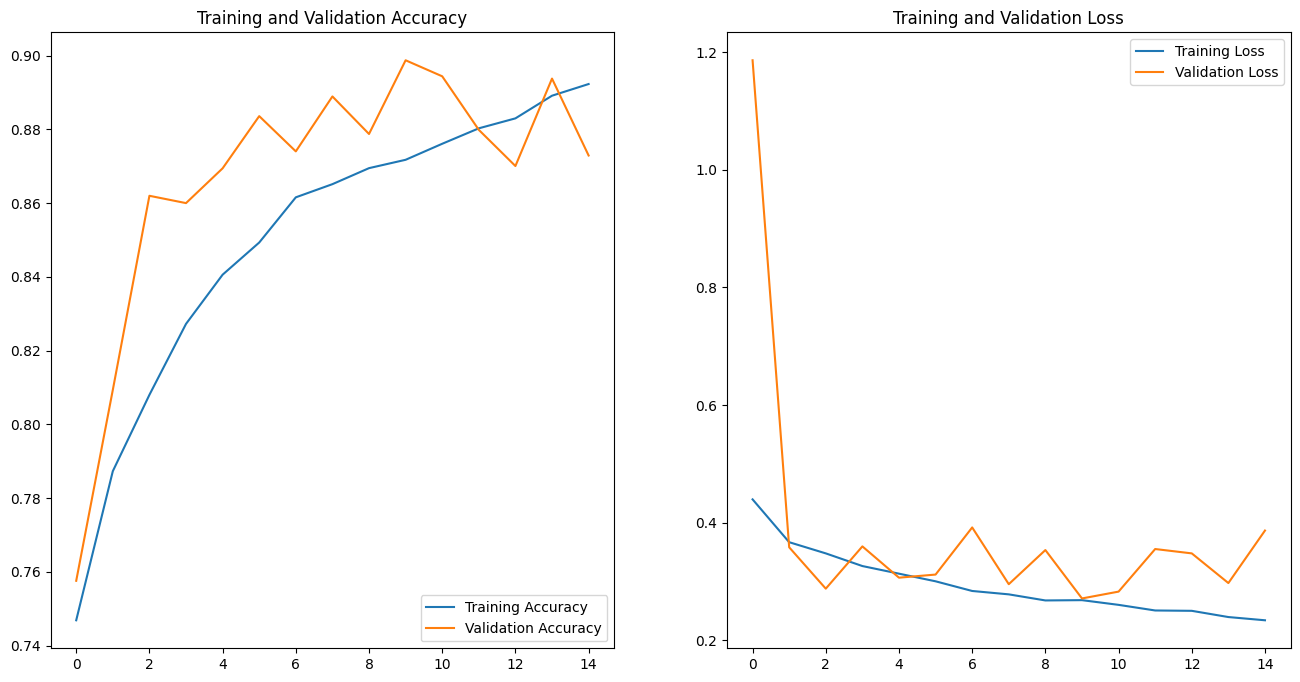

In [35]:
plot_history(history01, 15)

In [36]:
model01.save_weights("premier_model.weights.h5")


In [37]:
test_predictions = model01.predict(test_set)


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step


In [38]:
model01.evaluate(test_set)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - AUC: 0.9514 - accuracy: 0.8694 - loss: 0.3762


[0.3865315914154053, 0.948621392250061, 0.8728897571563721]

## Confusion Matrix
The confusion matrix is a performance evaluation tool for classification models. It presents a table where each row represents the instances of the actual class, and each column represents the instances of the predicted class. It helps identify specific classification errors, such as false positives (incorrect predictions) and false negatives. A confusion matrix thus provides a better understanding of how a model performs for each class individually.

We create the function `plot_confusion_matrix` which takes as input the test data, the predictions, and the class labels. This function calculates the matrix

In [39]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# binary classification
def plot_confusion_matrix(test_set, test_predictions, class_labels):
    y_true = []
    for _, label in test_set:
        y_true.extend(label.numpy())
    y_true = np.array(y_true)

    y_pred = test_predictions > 0.5
    y_pred = y_pred.reshape(y_true.shape)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

2024-10-11 00:14:00.499269: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


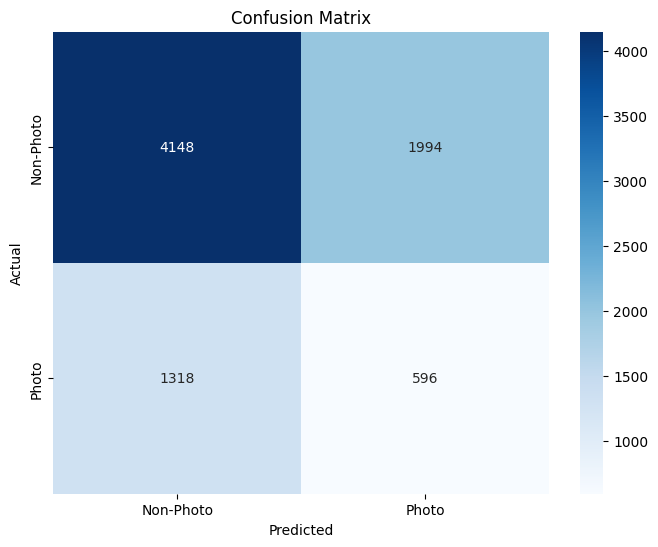

In [40]:

plot_confusion_matrix(test_set, test_predictions, class_labels)

## Visualizing predictions

The `plot_predictions` function takes as input a dataset, a list of class names, and predictions, and displays the images along with the predicted labels.

In [41]:
def plot_predictions(dataset, class_names, predictions, batch=1):
    plt.figure(figsize=(15, 15))
    # Take the specified batch from the dataset
    for images, labels in dataset.skip(batch-1).take(1):  # Skip to the desired batch
        labels = labels.numpy()  # Convert tensor labels to numpy array
        for i in range(len(images)):  # Loop through the batch
            ax = plt.subplot(6, 6, i + 1)  # Create a subplot for each image    
            plt.imshow(images[i].numpy().astype("uint8"))  # Show the image   
            # Determine the color of the title (green if prediction is correct, red otherwise)
            color = "green" if np.argmax(labels[i]) == np.argmax(predictions[i + (batch-1)*128]) else "red" 
            # Display the actual and predicted class
            plt.title(f'Actual: {class_names[np.argmax(labels[i])]}\nPredicted: {class_names[np.argmax(predictions[i + (batch-1)*128])]}', color=color)
            plt.axis("off")  # Hide the axis

    plt.show()
    
# plot_predictions(test_set, class_labels, test_predictions, 1)

We try to add more epochs to our model to see if it improves its performance. We will use the Adam optimizer with a learning rate of 0.0001 and L2 regularization with

In [45]:
model02 = generate_model(optimizer = tf.keras.optimizers.Adam(0.0001), l2=0.001)
model02.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 120, 120, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 60, 60, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,867,297 (7.12 MB)

 Trainable params: 1,867,169 (7.12 MB)

 Non-trainable params: 128 (512.00 B)

In [46]:
epochs = 15 

history02 = model02.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set,
    class_weight=class_weight_dict
)


Epoch 1/15
  6/252 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - AUC: 0.7485 - accuracy: 0.6568 - loss: 0.9066

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - AUC: 0.8716 - accuracy: 0.7586 - loss: 0.7156 - val_AUC: 0.9252 - val_accuracy: 0.7818 - val_loss: 0.7793
Epoch 2/15
 11/252 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - AUC: 0.9236 - accuracy: 0.8294 - loss: 0.5854

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - AUC: 0.9252 - accuracy: 0.8210 - loss: 0.5770 - val_AUC: 0.9321 - val_accuracy: 0.8466 - val_loss: 0.5453
Epoch 3/15
  6/252 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - AUC: 0.9350 - accuracy: 0.8383 - loss: 0.5256

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - AUC: 0.9341 - accuracy: 0.8391 - loss: 0.5278 - val_AUC: 0.9434 - val_accuracy: 0.8559 - val_loss: 0.4940
Epoch 4/15
 23/252 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - AUC: 0.9436 - accuracy: 0.8517 - loss: 0.4927

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - AUC: 0.9423 - accuracy: 0.8501 - loss: 0.4909 - val_AUC: 0.9504 - val_accuracy: 0.8549 - val_loss: 0.4951
Epoch 5/15
  6/252 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - AUC: 0.9464 - accuracy: 0.8304 - loss: 0.4755

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - AUC: 0.9490 - accuracy: 0.8569 - loss: 0.4568 - val_AUC: 0.9478 - val_accuracy: 0.8811 - val_loss: 0.4350
Epoch 6/15
 11/252 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - AUC: 0.9550 - accuracy: 0.8636 - loss: 0.4353

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - AUC: 0.9534 - accuracy: 0.8677 - loss: 0.4316 - val_AUC: 0.9512 - val_accuracy: 0.8977 - val_loss: 0.3978
Epoch 7/15
 16/252 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - AUC: 0.9578 - accuracy: 0.8808 - loss: 0.4100

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - AUC: 0.9557 - accuracy: 0.8737 - loss: 0.4136 - val_AUC: 0.9572 - val_accuracy: 0.8821 - val_loss: 0.4152
Epoch 8/15
  7/252 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - AUC: 0.9553 - accuracy: 0.8676 - loss: 0.4089

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - AUC: 0.9593 - accuracy: 0.8745 - loss: 0.3948 - val_AUC: 0.9566 - val_accuracy: 0.8740 - val_loss: 0.4304
Epoch 9/15
  7/252 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - AUC: 0.9664 - accuracy: 0.8923 - loss: 0.3714

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - AUC: 0.9616 - accuracy: 0.8820 - loss: 0.3788 - val_AUC: 0.9557 - val_accuracy: 0.8899 - val_loss: 0.3890
Epoch 10/15
 19/252 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - AUC: 0.9643 - accuracy: 0.8793 - loss: 0.3612

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - AUC: 0.9615 - accuracy: 0.8813 - loss: 0.3729 - val_AUC: 0.9470 - val_accuracy: 0.8910 - val_loss: 0.3856
Epoch 11/15
  2/252 ━━━━━━━━━━━━━━━━━━━━ 32s 131ms/step - AUC: 0.9532 - accuracy: 0.8398 - loss: 0.4069 

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - AUC: 0.9635 - accuracy: 0.8864 - loss: 0.3618 - val_AUC: 0.9596 - val_accuracy: 0.9022 - val_loss: 0.3493
Epoch 12/15
 16/252 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - AUC: 0.9659 - accuracy: 0.8988 - loss: 0.3428

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - AUC: 0.9646 - accuracy: 0.8883 - loss: 0.3506 - val_AUC: 0.9593 - val_accuracy: 0.9086 - val_loss: 0.3375
Epoch 13/15
 15/252 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - AUC: 0.9710 - accuracy: 0.8928 - loss: 0.3228

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - AUC: 0.9665 - accuracy: 0.8918 - loss: 0.3402 - val_AUC: 0.9554 - val_accuracy: 0.9032 - val_loss: 0.3463
Epoch 14/15
  1/252 ━━━━━━━━━━━━━━━━━━━━ 40s 162ms/step - AUC: 0.9653 - accuracy: 0.8984 - loss: 0.3212

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - AUC: 0.9668 - accuracy: 0.8923 - loss: 0.3358 - val_AUC: 0.9573 - val_accuracy: 0.9050 - val_loss: 0.3348
Epoch 15/15
  1/252 ━━━━━━━━━━━━━━━━━━━━ 56s 226ms/step - AUC: 0.9890 - accuracy: 0.9375 - loss: 0.2837

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - AUC: 0.9682 - accuracy: 0.8953 - loss: 0.3281 - val_AUC: 0.9610 - val_accuracy: 0.8982 - val_loss: 0.3435


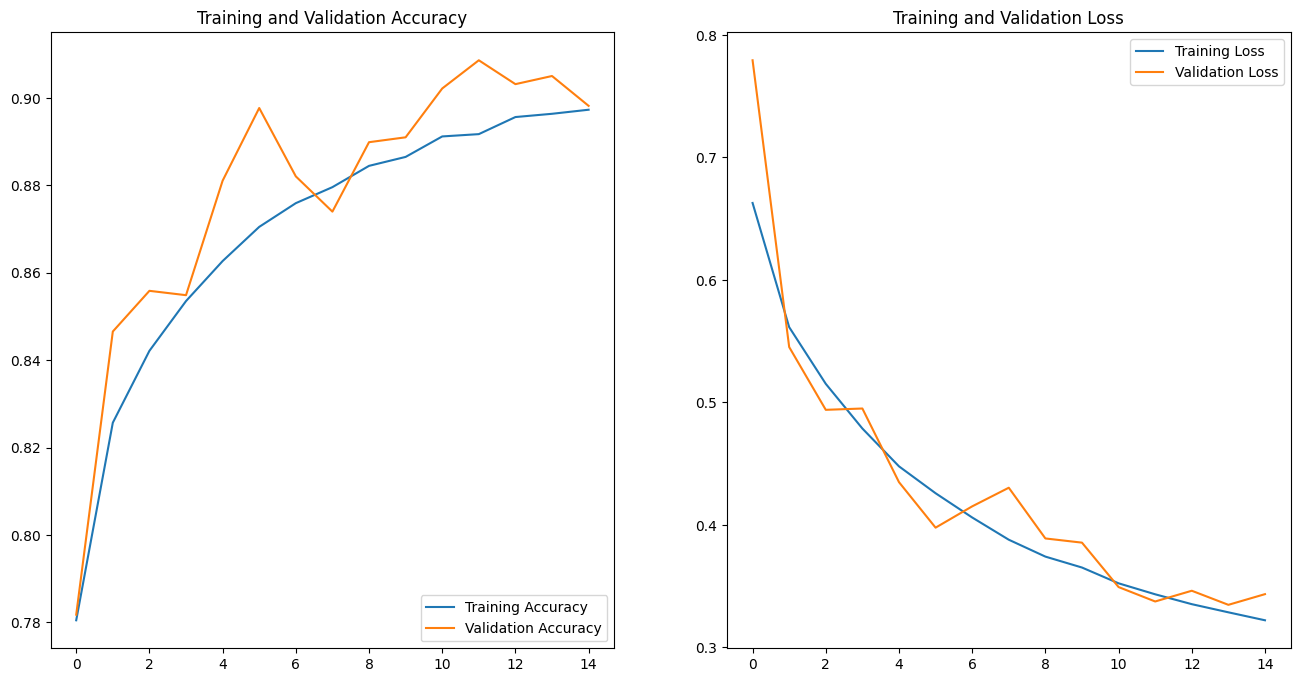

In [47]:
plot_history(history02,epochs=15)

With the new results we can see that our model is now performing better on both the training and validation sets.

In [48]:
model02.save_weights("dexieme_model_15epoques.weights.h5")


In [49]:
test_predictions_model02 = model02.predict(test_set)


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step


In [50]:
model02.evaluate(test_set)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - AUC: 0.9578 - accuracy: 0.8959 - loss: 0.3536


[0.34353262186050415, 0.9609986543655396, 0.8982124924659729]

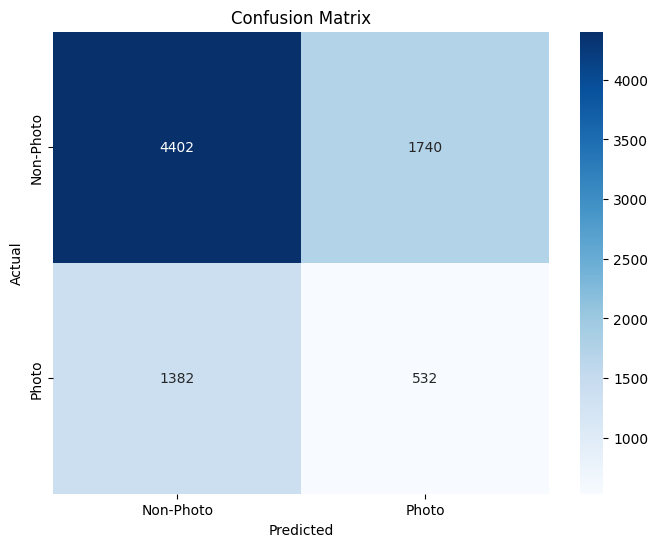

In [51]:
plot_confusion_matrix(test_set, test_predictions_model02, class_labels)

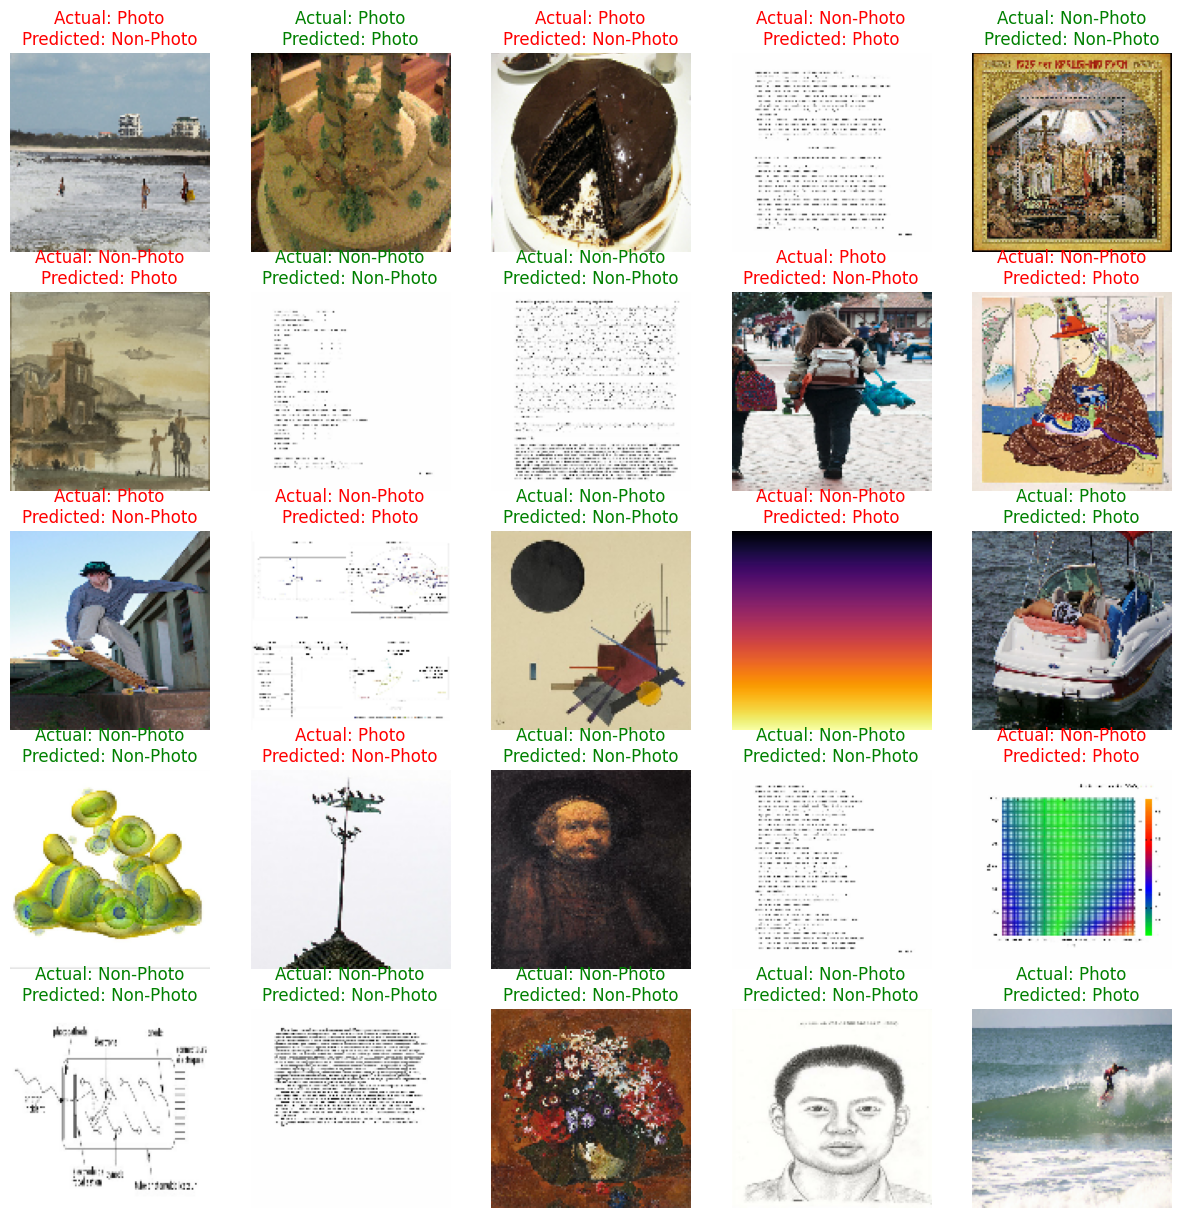

In [42]:
plot_predictions(test_set, class_labels, test_predictions_model02)

# Hyperparameters optimization
## Tuning First Step

**Hyperparameter Tuning in AI and TensorFlow**

Hyperparameter tuning is a crucial step in developing effective machine learning models. It involves selecting the best set of hyperparameters that optimize a model’s performance. In the context of TensorFlow, a widely-used machine learning framework, hyperparameter tuning can significantly enhance the performance of neural networks and other models by systematically exploring different configurations.

---

### **1. What is Hyperparameter Tuning in AI and Specifically in TensorFlow?**

**Hyperparameters vs. Parameters:**
- **Parameters:** These are the internal variables of the model (e.g., weights and biases in a neural network) that are learned during the training process.
- **Hyperparameters:** These are external configurations set before training (e.g., learning rate, number of layers, number of neurons per layer, batch size) that govern the training process and model architecture.

**Hyperparameter Tuning:**
- **Objective:** To find the set of hyperparameters that yield the best performance for a given model on a specific task.
- **Process:** Involves searching through a predefined hyperparameter space using various strategies to identify the optimal combination.

**In TensorFlow:**
- TensorFlow, especially when used with Keras, provides tools like **Keras Tuner** to facilitate hyperparameter tuning.
- **Keras Tuner** simplifies the process by offering different tuning algorithms, allowing you to define hyperparameter search spaces, and managing the search process.

---

### **2. Tuners Available in TensorFlow (via Keras Tuner)**

**Keras Tuner** offers several tuners, each utilizing different search strategies to navigate the hyperparameter space effectively:

1. **RandomSearch:**
   - **Description:** Samples hyperparameters randomly from the defined search space.
   - **Use Case:** Simple and effective for smaller search spaces or when computational resources are limited.

2. **Hyperband:**
   - **Description:** An advanced method that combines random search with adaptive resource allocation and early stopping.
   - **Use Case:** Efficient for large hyperparameter spaces and when you want to allocate resources dynamically based on performance.

3. **BayesianOptimization:**
   - **Description:** Uses probabilistic models to predict the performance of hyperparameters and selects the next set of hyperparameters based on these predictions.
   - **Use Case:** Effective for scenarios where you want to balance exploration and exploitation, especially when evaluations are expensive.

4. **Sklearn Tuner:**
   - **Description:** Integrates scikit-learn’s hyperparameter tuning methods with Keras models.
   - **Use Case:** Useful if you prefer scikit-learn’s tuning methods like GridSearchCV or RandomizedSearchCV.

**Choosing the Right Tuner:**
- **RandomSearch:** Quick and easy, suitable for initial explorations.
- **Hyperband:** Best for efficient resource utilization, especially with limited computational budgets.
- **BayesianOptimization:** Ideal when you need a more informed search strategy based on previous evaluations.

---

### **3. The Hyperband Tuner in TensorFlow: What It Is and How It Works**

**Overview of Hyperband:**
Hyperband is a state-of-the-art hyperparameter optimization algorithm that efficiently allocates resources (like training epochs) to different hyperparameter configurations. It builds upon the Successive Halving algorithm to perform hyperparameter tuning in a resource-efficient manner.

**Key Concepts:**

- **Successive Halving (SH):** Starts with a large number of hyperparameter configurations and allocates a small amount of resources to each. The worst-performing half of the configurations are then discarded, and the remaining half receive more resources. This process repeats until the best configuration is identified.

- **Bracket:** Hyperband runs multiple Successive Halving processes (brackets) with different initial resource allocations, allowing it to explore a diverse set of hyperparameter configurations.

**How Hyperband Works:**

1. **Define Maximum Resources (`max_epochs`):**
   - The maximum amount of resources (e.g., epochs) allocated to any single hyperparameter configuration.

2. **Define a Reduction Factor (`factor`):**
   - Determines how aggressively Hyperband reduces the number of configurations in each round. A common choice is `factor=3`.

3. **Multiple Brackets:**
   - Hyperband runs several brackets, each corresponding to a different initial number of configurations and resource allocations.

4. **Successive Halving within Each Bracket:**
   - For each bracket, Hyperband starts with a set of hyperparameter configurations and allocates a small amount of resources.
   - After each round, it keeps the top-performing configurations and allocates more resources to them.
   - This continues until the maximum resource is reached or only one configuration remains.

5. **Final Selection:**
   - After all brackets have been processed, Hyperband selects the best-performing hyperparameter configuration across all brackets.

**Advantages of Hyperband:**

- **Efficiency:** Allocates resources dynamically, focusing more on promising configurations.
- **Scalability:** Can handle large hyperparameter spaces effectively.
- **Automation:** Reduces the need for manual intervention in resource allocation.

**Using Hyperband in TensorFlow (Keras Tuner):**

Here's a step-by-step guide to implementing Hyperband using Keras Tuner in TensorFlow:

1. **Install Keras Tuner (if not already installed):**
   ```bash
   pip install keras-tuner
   ```

2. **Import Necessary Libraries:**
   ```python
   import tensorflow as tf
   from tensorflow import keras
   from tensorflow.keras import layers
   from kerastuner import Hyperband
   ```

3. **Define the Model-Building Function:**
   This function includes the hyperparameters you want to tune.
   ```python
   def build_model(hp):
       model = keras.Sequential()
       model.add(layers.Dense(
           units=hp.Int('units', min_value=32, max_value=512, step=32),
           activation='relu'))
       model.add(layers.Dense(10, activation='softmax'))
       
       model.compile(
           optimizer=keras.optimizers.Adam(
               hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
       return model
   ```

4. **Instantiate the Hyperband Tuner:**
   ```python
   tuner = Hyperband(
       build_model,
       objective='val_accuracy',
       max_epochs=50,
       factor=3,
       directory='my_dir',
       project_name='hyperband_tuning'
   )
   ```

   - **Parameters:**
     - `build_model`: The model-building function.
     - `objective`: The metric to optimize (e.g., validation accuracy).
     - `max_epochs`: Maximum number of epochs to train each model.
     - `factor`: Reduction factor for resource allocation.
     - `directory`: Directory to save tuning results.
     - `project_name`: Name of the tuning project.

5. **Set Up Early Stopping (Optional but Recommended):**
   ```python
   stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
   ```

6. **Run the Hyperparameter Search:**
   ```python
   tuner.search(
       x_train, y_train,
       epochs=50,
       validation_data=(x_val, y_val),
       callbacks=[stop_early]
   )
   ```

7. **Retrieve the Best Hyperparameters:**
   ```python
   best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
   
   print(f"""
   The optimal number of units in the first layer is {best_hps.get('units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
   """)
   ```

8. **Build and Train the Final Model:**
   ```python
   model = tuner.hypermodel.build(best_hps)
   history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))
   ```

**Visual Representation:**

Hyperband can be visualized as multiple parallel Successive Halving processes (brackets) running with different starting points, effectively covering various trade-offs between exploration (trying many configurations with fewer resources) and exploitation (focusing on fewer configurations with more resources).

---

### **Conclusion**

Hyperparameter tuning is essential for maximizing the performance of machine learning models. TensorFlow, through Keras Tuner, offers powerful tools like Hyperband to streamline this process. The Hyperband tuner intelligently balances exploration and exploitation by dynamically allocating resources to promising hyperparameter configurations, making it both efficient and effective for complex models and large hyperparameter spaces.

By leveraging Hyperband in TensorFlow, you can automate the search for optimal hyperparameters, leading to better-performing models with less manual effort. Whether you're working on deep learning, neural networks, or other machine learning tasks, understanding and utilizing Hyperband can significantly enhance your model development workflow.

In [55]:

def build_model(hp):
    n_conv_layers = hp.Int('n_conv_layers', 2, 5)
    l1 = 0.0
    l2 = 0.001
    
    model = Sequential()
    
    model.add(data_augmentation)
    
    model.add(layers.Rescaling(1./255, input_shape=(image_h, image_w, 3)))
    
    for i in range(n_conv_layers):
        model.add(layers.Conv2D(2**(i+3), (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1, l2=l2)))
        model.add(layers.MaxPooling2D((2, 2), padding='same'))
        
    model.add(layers.BatchNormalization())
        
    model.add(layers.Flatten())
    
    n_neurons = hp.Int('n_neurons', 128, 512, 128)
    model.add(layers.Dense(n_neurons, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1, l2=l2)))
    
    model.add(layers.Dropout(hp.Float('dropout', 0.0, 0.5, 0.1)))
    
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
                    optimizer=tf.keras.optimizers.Adam(1e-4),
                    loss='binary_crossentropy',
                    metrics=['AUC','accuracy'],
                  )
    
    return model

In [56]:
import keras_tuner as kt


tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=15,
    factor=3,
    directory='my_dir',
    project_name='photo_classification_binary_6'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

We initializes a Hyperband tuner to optimize the model’s hyperparameters for classification. The `kt.Hyperband` function takes the model-building function, the optimization objective (`val_accuracy`), the maximum number of epochs for each trial, the directory to store results, and the project name as inputs. 

The `stop_early` variable uses an `EarlyStopping` callback to halt training if the validation loss doesn’t improve for 5 consecutive epochs, helping to prevent overfitting.

The `lr_schedule` variable uses a learning rate scheduler to decrease the learning rate exponentially after every 20 epochs. This helps to prevent the model from getting stuck in a local minimum.

In [57]:
tuner.search(
    train_set,
    validation_data=test_set,
    epochs=15,
    callbacks=[stop_early, lr_schedule],
    class_weight=class_weight_dict
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 03m 41s]
val_accuracy: 0.8809583187103271

Best val_accuracy So Far: 0.8848063349723816
Total elapsed time: 00h 41m 58s


In this block, the `tuner.search()` method is used to search for the best hyperparameters using the training and validation datasets. The callbacks `stop_early` and `tensorboard_callback` (not defined here but assumed to be declared elsewhere) are included to monitor the training. 

The `tuner.get_best_hyperparameters` method is then used to retrieve the best configuration, and `print(best_hps.values)` displays the values of the best-found hyperparameters.

In [58]:
print(best_hps.values)

{'n_conv_layers': 4, 'n_neurons': 384, 'dropout': 0.2, 'tuner/epochs': 15, 'tuner/initial_epoch': 5, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0015'}


In [59]:
model_best_hps = tuner.hypermodel.build(best_hps)
model_best_hps.summary()
history_best_gp = model_best_hps.fit(train_set, validation_data=test_set, epochs=15, class_weight=class_weight_dict)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 120, 120, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 60, 60, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 384)            │     1,573,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,598,417 (6.10 MB)

 Trainable params: 1,598,289 (6.10 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/15
 19/252 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - AUC: 0.7917 - accuracy: 0.7091 - loss: 1.3092

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - AUC: 0.8724 - accuracy: 0.7695 - loss: 1.1457 - val_AUC: 0.8812 - val_accuracy: 0.7994 - val_loss: 1.0286
Epoch 2/15
  9/252 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - AUC: 0.9142 - accuracy: 0.7916 - loss: 0.9505

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - AUC: 0.9160 - accuracy: 0.8027 - loss: 0.9071 - val_AUC: 0.8991 - val_accuracy: 0.8020 - val_loss: 0.8308
Epoch 3/15
  6/252 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - AUC: 0.9364 - accuracy: 0.8264 - loss: 0.7966

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - AUC: 0.9306 - accuracy: 0.8235 - loss: 0.7842 - val_AUC: 0.9340 - val_accuracy: 0.7772 - val_loss: 0.8785
Epoch 4/15
 32/252 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - AUC: 0.9439 - accuracy: 0.8430 - loss: 0.7013

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - AUC: 0.9406 - accuracy: 0.8411 - loss: 0.6993 - val_AUC: 0.9283 - val_accuracy: 0.8251 - val_loss: 0.7277
Epoch 5/15
 25/252 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - AUC: 0.9464 - accuracy: 0.8566 - loss: 0.6472

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - AUC: 0.9459 - accuracy: 0.8566 - loss: 0.6410 - val_AUC: 0.9367 - val_accuracy: 0.8822 - val_loss: 0.5997
Epoch 6/15
  6/252 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - AUC: 0.9489 - accuracy: 0.8674 - loss: 0.6061

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - AUC: 0.9499 - accuracy: 0.8621 - loss: 0.5918 - val_AUC: 0.9450 - val_accuracy: 0.8354 - val_loss: 0.6559
Epoch 7/15
  7/252 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - AUC: 0.9512 - accuracy: 0.8690 - loss: 0.5641

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - AUC: 0.9544 - accuracy: 0.8690 - loss: 0.5497 - val_AUC: 0.9372 - val_accuracy: 0.8719 - val_loss: 0.5604
Epoch 8/15


Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - AUC: 0.9563 - accuracy: 0.8746 - loss: 0.5185 - val_AUC: 0.9469 - val_accuracy: 0.8867 - val_loss: 0.5072
Epoch 9/15
  1/252 ━━━━━━━━━━━━━━━━━━━━ 36s 147ms/step - AUC: 0.9626 - accuracy: 0.8594 - loss: 0.4876

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - AUC: 0.9586 - accuracy: 0.8758 - loss: 0.4893 - val_AUC: 0.9372 - val_accuracy: 0.8491 - val_loss: 0.5627
Epoch 10/15
  1/252 ━━━━━━━━━━━━━━━━━━━━ 1:03 253ms/step - AUC: 0.9778 - accuracy: 0.8984 - loss: 0.4061

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - AUC: 0.9615 - accuracy: 0.8831 - loss: 0.4623 - val_AUC: 0.9389 - val_accuracy: 0.8822 - val_loss: 0.4928
Epoch 11/15
 10/252 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - AUC: 0.9622 - accuracy: 0.8911 - loss: 0.4495

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - AUC: 0.9617 - accuracy: 0.8827 - loss: 0.4456 - val_AUC: 0.9539 - val_accuracy: 0.8847 - val_loss: 0.4629
Epoch 12/15
  4/252 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - AUC: 0.9639 - accuracy: 0.8900 - loss: 0.4239

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - AUC: 0.9633 - accuracy: 0.8879 - loss: 0.4267 - val_AUC: 0.9520 - val_accuracy: 0.8841 - val_loss: 0.4527
Epoch 13/15
  8/252 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - AUC: 0.9642 - accuracy: 0.8816 - loss: 0.4092

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - AUC: 0.9655 - accuracy: 0.8889 - loss: 0.4066 - val_AUC: 0.9370 - val_accuracy: 0.8749 - val_loss: 0.4627
Epoch 14/15
  1/252 ━━━━━━━━━━━━━━━━━━━━ 58s 235ms/step - AUC: 0.9614 - accuracy: 0.8828 - loss: 0.3998

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - AUC: 0.9657 - accuracy: 0.8911 - loss: 0.3942 - val_AUC: 0.9553 - val_accuracy: 0.8694 - val_loss: 0.4642
Epoch 15/15
 20/252 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - AUC: 0.9707 - accuracy: 0.8985 - loss: 0.3703

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - AUC: 0.9673 - accuracy: 0.8914 - loss: 0.3812 - val_AUC: 0.9610 - val_accuracy: 0.9054 - val_loss: 0.3722


This part shows how we build and train the model using the best hyperparameters obtained earlier. 

The line `tuner.hypermodel.build(best_hps)` creates a model based on the optimal configuration, and `model.fit()` trains the model for 15 epochs using the training and validation datasets, with class weights to address potential class imbalance. 

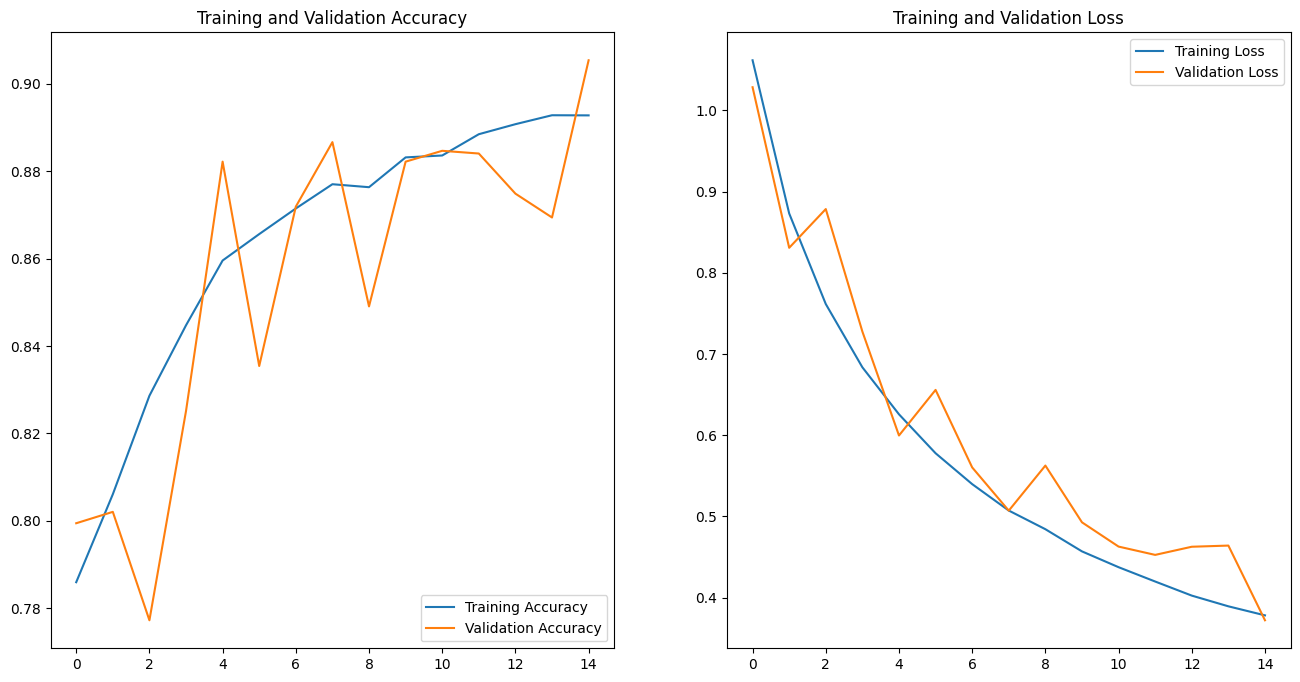

In [60]:
plot_history(history_best_gp,15)


This plot shows the training history of the model with the best hyperparameters. The loss and accuracy curves are plotted for both the training and validation datasets. The model seems to be overfitting slightly, but the noise in the training process is still noticeable.

The plot shows that while the model achieves better accuracy, there is significant noise in the training process. This is evident from the fluctuations in both the loss and accuracy curves. Such instability can indicate several issues:


### Deuxieme phase de tuning: Regularization

In [18]:
# tuning a new model with the best hyperparameters, and testing different regularization values
# we fix the previous hyperparameters and test different values for regularization params
def build_model(hp):
    n_conv_layers = best_hps.get('n_conv_layers')
    l1 = hp.Choice('l1', [0., 0.01, 0.001, 0.0001])
    l2 = hp.Choice('l2', [0., 0.01, 0.001, 0.0001])
    
    model = Sequential()
    
    model.add(data_augmentation)
    
    model.add(layers.Rescaling(1./255, input_shape=(image_h, image_w, 3)))
    
    for i in range(n_conv_layers):
        model.add(layers.Conv2D(2**(i+3), (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1, l2=l2)))
        model.add(layers.MaxPooling2D((2, 2), padding='same'))
    
    batch_norm = hp.Boolean('batch_norm')
    if batch_norm:
        model.add(layers.BatchNormalization()) 
        
    model.add(layers.Flatten())
    
    n_neurons = best_hps.get('n_neurons')
    model.add(layers.Dense(n_neurons, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1, l2=l2)))
    
    model.add(layers.Dropout(best_hps.get('dropout')))
    
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
                    optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                    loss='binary_crossentropy',
                    metrics=['accuracy'],
                  )
    
    return model

In [19]:
tuner2 = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=15,
    factor=3,
    directory='my_dir',
    project_name='photo_classification_binary_regularization_1'
)

Reloading Tuner from my_dir/photo_classification_binary_regularization_1/tuner0.json


In [20]:
tuner2.search(
    train_set,
    validation_data=test_set,
    epochs=15,
    callbacks=[stop_early, lr_schedule],
)

best_hps2 = tuner2.get_best_hyperparameters(num_trials=1)[0]

Trial 27 Complete [00h 04m 06s]
val_accuracy: 0.887164831161499

Best val_accuracy So Far: 0.887164831161499
Total elapsed time: 00h 38m 11s


In [23]:
print(best_hps2.values)

{'l1': 0.0001, 'l2': 0.0001, 'batch_norm': False, 'learning_rate': 0.0001, 'tuner/epochs': 15, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [21]:
# build the model with the best hyperparameters
model_best_hps2 = tuner2.hypermodel.build(best_hps2)
model_best_hps2.summary()

# train the model with the best hyperparameters
history_best_gp2 = model_best_hps2.fit(train_set, validation_data=test_set, epochs=15, class_weight=class_weight_dict)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 120, 120, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 60, 60, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 384)            │       786,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 885,585 (3.38 MB)

 Trainable params: 885,585 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
  4/252 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.4845 - loss: 3.0705 

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.7077 - loss: 2.5705 - val_accuracy: 0.7083 - val_loss: 1.7121
Epoch 2/15
  4/252 ━━━━━━━━━━━━━━━━━━━━ 31s 127ms/step - accuracy: 0.6717 - loss: 1.6476 

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7335 - loss: 1.4660 - val_accuracy: 0.7556 - val_loss: 1.1407
Epoch 3/15
  3/252 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.7357 - loss: 1.1369  

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7498 - loss: 1.0858 - val_accuracy: 0.7594 - val_loss: 0.9803
Epoch 4/15
  7/252 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.7597 - loss: 0.9651

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.7598 - loss: 0.9448 - val_accuracy: 0.7808 - val_loss: 0.8636
Epoch 5/15
 12/252 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.7620 - loss: 0.8947

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7626 - loss: 0.8626 - val_accuracy: 0.7929 - val_loss: 0.7840
Epoch 6/15
  3/252 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.8134 - loss: 0.7974

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.7716 - loss: 0.7901 - val_accuracy: 0.7974 - val_loss: 0.7256
Epoch 7/15
  6/252 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.7839 - loss: 0.7709 

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7741 - loss: 0.7399 - val_accuracy: 0.7686 - val_loss: 0.7505
Epoch 8/15
  1/252 ━━━━━━━━━━━━━━━━━━━━ 1:02 249ms/step - accuracy: 0.7344 - loss: 0.7419

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.7760 - loss: 0.6993 - val_accuracy: 0.7825 - val_loss: 0.6839
Epoch 9/15
  1/252 ━━━━━━━━━━━━━━━━━━━━ 50s 201ms/step - accuracy: 0.8203 - loss: 0.7148

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7808 - loss: 0.6616 - val_accuracy: 0.7782 - val_loss: 0.6672
Epoch 10/15
  4/252 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.7780 - loss: 0.6459

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7854 - loss: 0.6360 - val_accuracy: 0.8214 - val_loss: 0.5886
Epoch 11/15
  2/252 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.8184 - loss: 0.6252 

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7845 - loss: 0.6175 - val_accuracy: 0.7726 - val_loss: 0.6447
Epoch 12/15
 25/252 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.7724 - loss: 0.6020

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.7830 - loss: 0.5974 - val_accuracy: 0.7814 - val_loss: 0.6058
Epoch 13/15
  2/252 ━━━━━━━━━━━━━━━━━━━━ 34s 139ms/step - accuracy: 0.7695 - loss: 0.5992

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.7865 - loss: 0.5766 - val_accuracy: 0.8203 - val_loss: 0.5375
Epoch 14/15
 10/252 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.8037 - loss: 0.5528

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7936 - loss: 0.5618 - val_accuracy: 0.7831 - val_loss: 0.5799
Epoch 15/15
  1/252 ━━━━━━━━━━━━━━━━━━━━ 49s 196ms/step - accuracy: 0.7891 - loss: 0.5801

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.7905 - loss: 0.5506 - val_accuracy: 0.7965 - val_loss: 0.5495


In [22]:
model_best_hps2.evaluate(test_set)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7942 - loss: 0.5559


[0.5495398640632629, 0.7965491414070129]

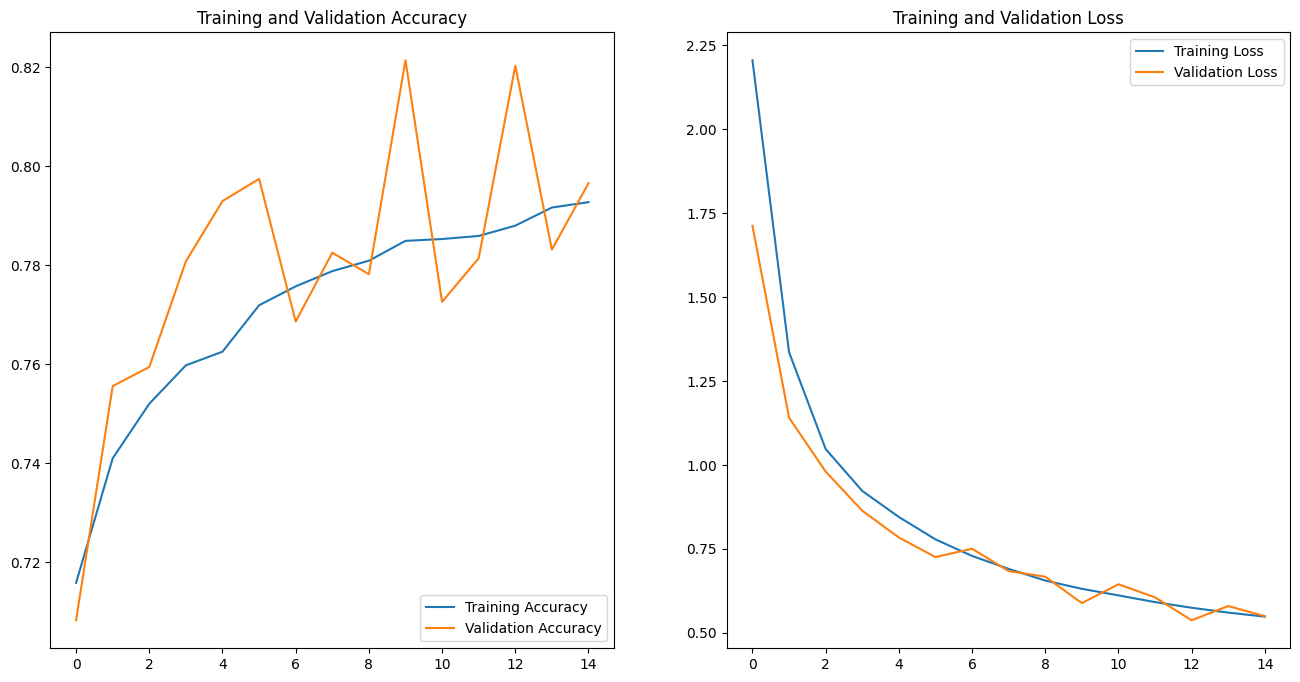

In [24]:
plot_history(history_best_gp2, 15)

### Training and Validation Accuracy (Left Graph)
- **Trend**: The training accuracy (blue line) steadily increases, which is expected as the model learns from the data. The validation accuracy (orange line), however, fluctuates more significantly across epochs, with sharp peaks and valleys.
- **Convergence**: Toward the end of training, the validation accuracy appears to stabilize and aligns closely with the training accuracy. This suggests that the model is starting to generalize better to the validation data.
- **Fluctuations**: The fluctuations in validation accuracy indicate that the model might be sensitive to the specific samples in each validation batch or there may be some degree of overfitting. However, the convergence of both lines towards the end suggests that the model is ultimately finding a balance between training and validation performance.

### Training and Validation Loss (Right Graph)
- **Trend**: Both training and validation losses decrease steadily over time, which indicates that the model is learning effectively. The initial sharp drop in both losses shows that the model quickly learns to reduce error in the first few epochs.
- **Convergence**: The training and validation losses converge around the end, reaching similar values. This alignment indicates that the model has achieved a stable fit and is not overfitting to the training data.
- **Consistency**: The losses continue to decrease at a similar rate, suggesting that the model is well-optimized and that the validation loss is not diverging, which is a good sign for generalization.

### Overall Interpretation
The model shows good learning progress, with both accuracy and loss metrics improving over time. The convergence of training and validation accuracy, along with the alignment of their respective losses, suggests that the model is not overfitting significantly and is capable of generalizing to new data. The fluctuations in validation accuracy could be due to batch-specific variations, but the trend suggests that the model has found a good balance by the final epochs.

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step


2024-10-10 19:08:30.468403: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


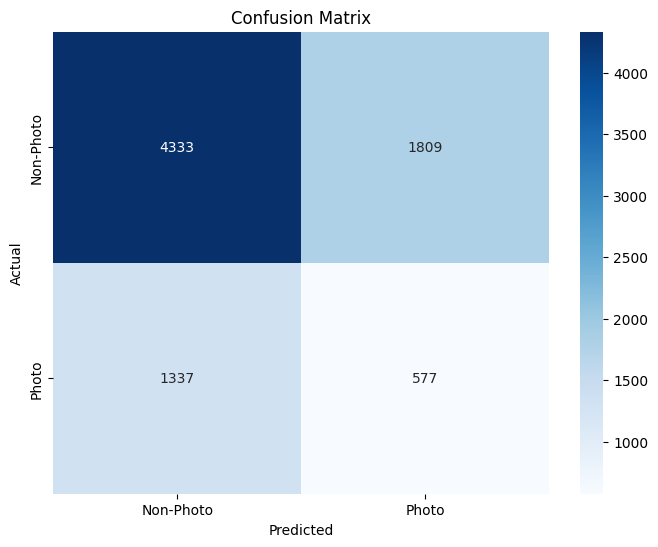

In [26]:
predictions = model_best_hps.predict(test_set)

plot_confusion_matrix(test_set, predictions, class_labels)

In [27]:
model_best_hps.evaluate(test_set)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9039 - loss: 0.2707


[0.2762130796909332, 0.9021847248077393]

In [32]:
model_best_hps.save("classifbfinale.keras")